# Classification

## 1. Environment Setup

In [48]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, r2_score

### 1.1 Clean Data

In [50]:
data = pd.read_csv('ENSO.csv')

# Remove rows with null values
data.dropna(inplace=True)

# Drop columns: 'date', 'year', 'month', and any season columns mentioned
# Adjust the column names to match those in your dataset
cols_to_drop = ['Date', 'Year', 'Month', 'Season (2-Month)', 'Season (3-Month)', 'Season (12-Month)']
existing_cols_to_drop = [col for col in cols_to_drop if col in data.columns]
data = data.drop(columns=existing_cols_to_drop, errors='ignore')

### 1.2 Encode Data

In [51]:
def encode_enso(value):
    if 'E' in value.upper():
        return 0
    elif 'N' in value.upper():
        return 1
    elif 'L' in value.upper():
        return 2
    else:
        # If there are unexpected values, handle gracefully
        return np.nan

if 'ENSO Phase-Intensity' in data.columns:
    data['ENSO'] = data['ENSO Phase-Intensity'].apply(encode_enso)
    data.drop(columns=['ENSO Phase-Intensity'], inplace=True)

data.head()

,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI,ENSO
384,0.11,24.28,-0.24,25.84,0.17,26.65,0.08,28.01,-0.21,-1.067,-1.75,0.9,1.2,-0.4,-0.1,0
385,0.21,25.38,-0.72,26.26,-0.11,26.54,-0.20,27.99,-0.11,-1.466,-1.20,0.1,0.3,-0.6,0.1,0
386,0.11,25.22,-1.38,26.92,-0.25,27.09,-0.14,28.18,-0.05,-1.922,-1.66,-0.6,0.6,-0.3,0.2,0
387,0.21,24.57,-1.16,27.52,-0.05,27.83,0.02,28.61,0.10,-2.359,-2.08,0.0,0.1,0.1,0.5,0
388,0.18,24.00,-0.62,27.70,0.49,28.37,0.49,29.19,0.40,-2.364,-0.53,0.4,-0.3,0.7,0.7,0


### 1.3 Standardize Data

In [52]:
# Prepare data
X = data.drop(columns=['ENSO'])
y = data['ENSO']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1.4 PCA

In [53]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['ENSO'] = y

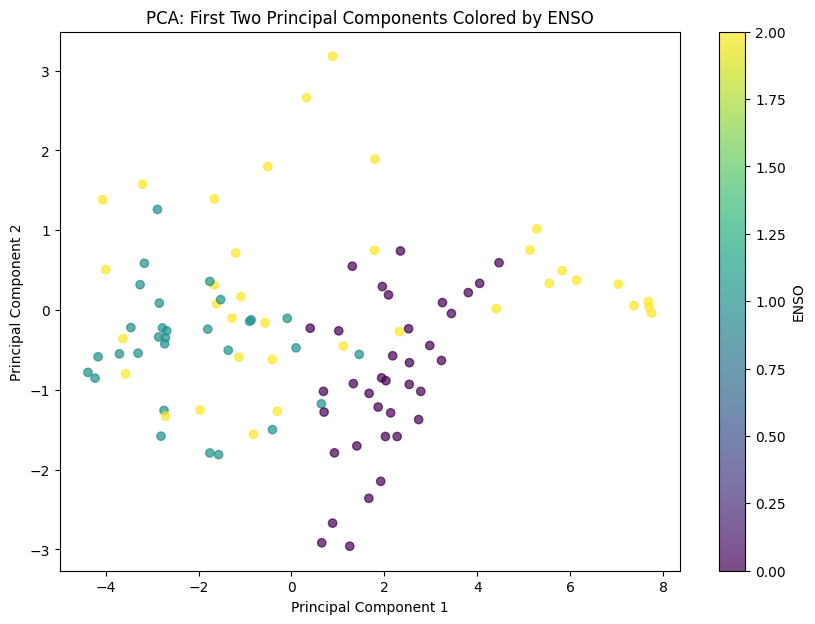

In [54]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['ENSO'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='ENSO')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ENSO')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## 2. Model

SVM Accuracy: 0.60


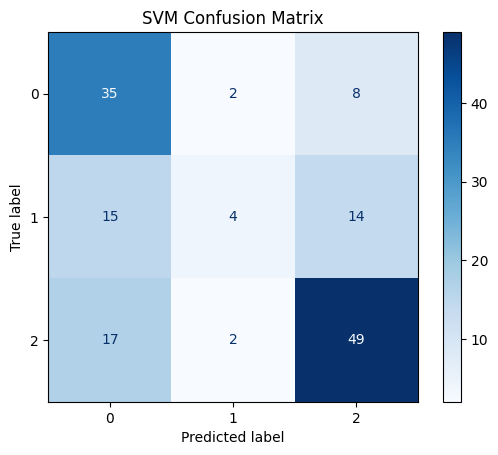

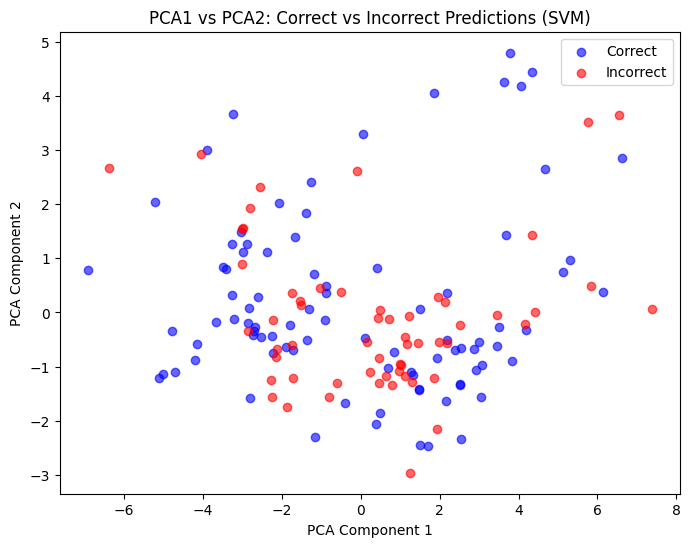

In [56]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Radial basis function kernel
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 6))

correct = y_test == y_pred
incorrect = y_test != y_pred
plt.scatter(X_test[correct, 0], X_test[correct, 1], color='blue', label='Correct', alpha=0.6)
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], color='red', label='Incorrect', alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA1 vs PCA2: Correct vs Incorrect Predictions (SVM)")
plt.legend()
plt.show()

# Regression

## 1. Clean Data

In [90]:
# Read in data
df = pd.read_csv('london_weather_data_1979_to_2023.csv')
df.dropna(inplace=True)

# Drop columns that start with 'Q_'
df = df.loc[:, ~df.columns.str.startswith('Q_')]

# Display the first few rows
df.head()

,DATE,TX,TN,TG,SS,SD,RR,QQ,PP,HU,CC
0,19790101,23.0,-75.0,-41.0,70.0,9.0,4.0,52.0,10190.0,83.0,2.0
1,19790102,16.0,-75.0,-26.0,17.0,8.0,0.0,27.0,10253.0,76.0,6.0
2,19790103,13.0,-72.0,-28.0,0.0,4.0,0.0,13.0,10205.0,86.0,5.0
3,19790104,-3.0,-65.0,-26.0,0.0,2.0,0.0,13.0,10084.0,68.0,8.0
4,19790105,56.0,-14.0,-8.0,20.0,1.0,0.0,29.0,10225.0,73.0,6.0


In [91]:
# Initialize variables
X = df.drop(columns=['DATE', 'SD'])
y = df[['SS']]

### 1.2 Standardize Data

In [92]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1.3 PCA

In [93]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['SS'] = y

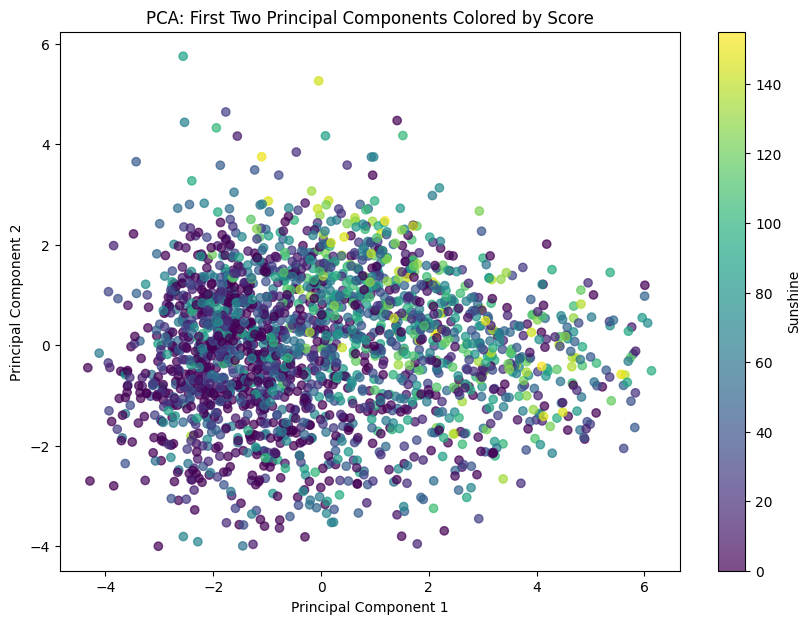

In [94]:
# Sample 15% of the data
sampled_data = pca_df.sample(frac=0.15, random_state=42)  # random_state ensures reproducibility

# Plot the first two principal components using the sampled data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(sampled_data['PC1'], sampled_data['PC2'], 
                      c=sampled_data['SS'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Sunshine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by Score')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.15, random_state=42)

## 2. Model

In [96]:
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')  # Radial basis function kernel
svr_model.fit(X_train, y_train)
plt.show()

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
# 3. Predictions
y_pred = svr_model.predict(X_test)
y_test = y_test.to_numpy().flatten()

# 4. Evaluate R² Score
r2 = r2_score(y_test, y_pred)
print(f"SVR R² Score: {r2:.2f}")

SVR R² Score: 0.87


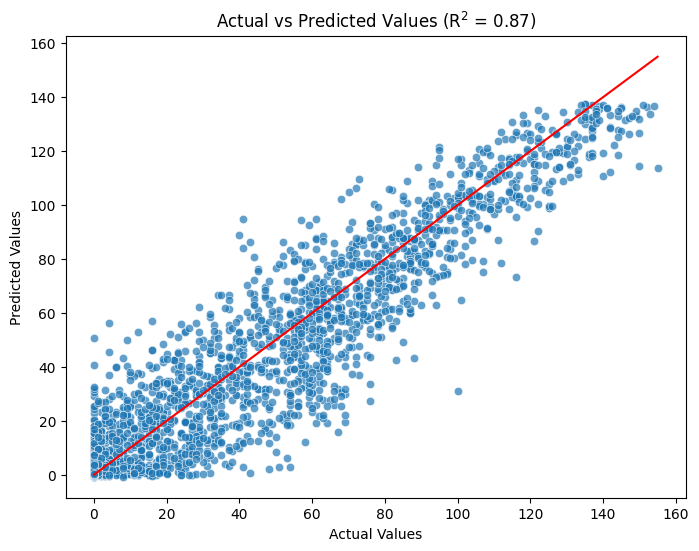

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=y_test, y=y_test, color='red')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R$^{2}$ = {r2:0.2f})')
plt.show()